In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('tips (data for regression problem).csv')


C:\Users\MALHAR PATIL\AppData\Local\Temp\ipykernel_11084\2686568931.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


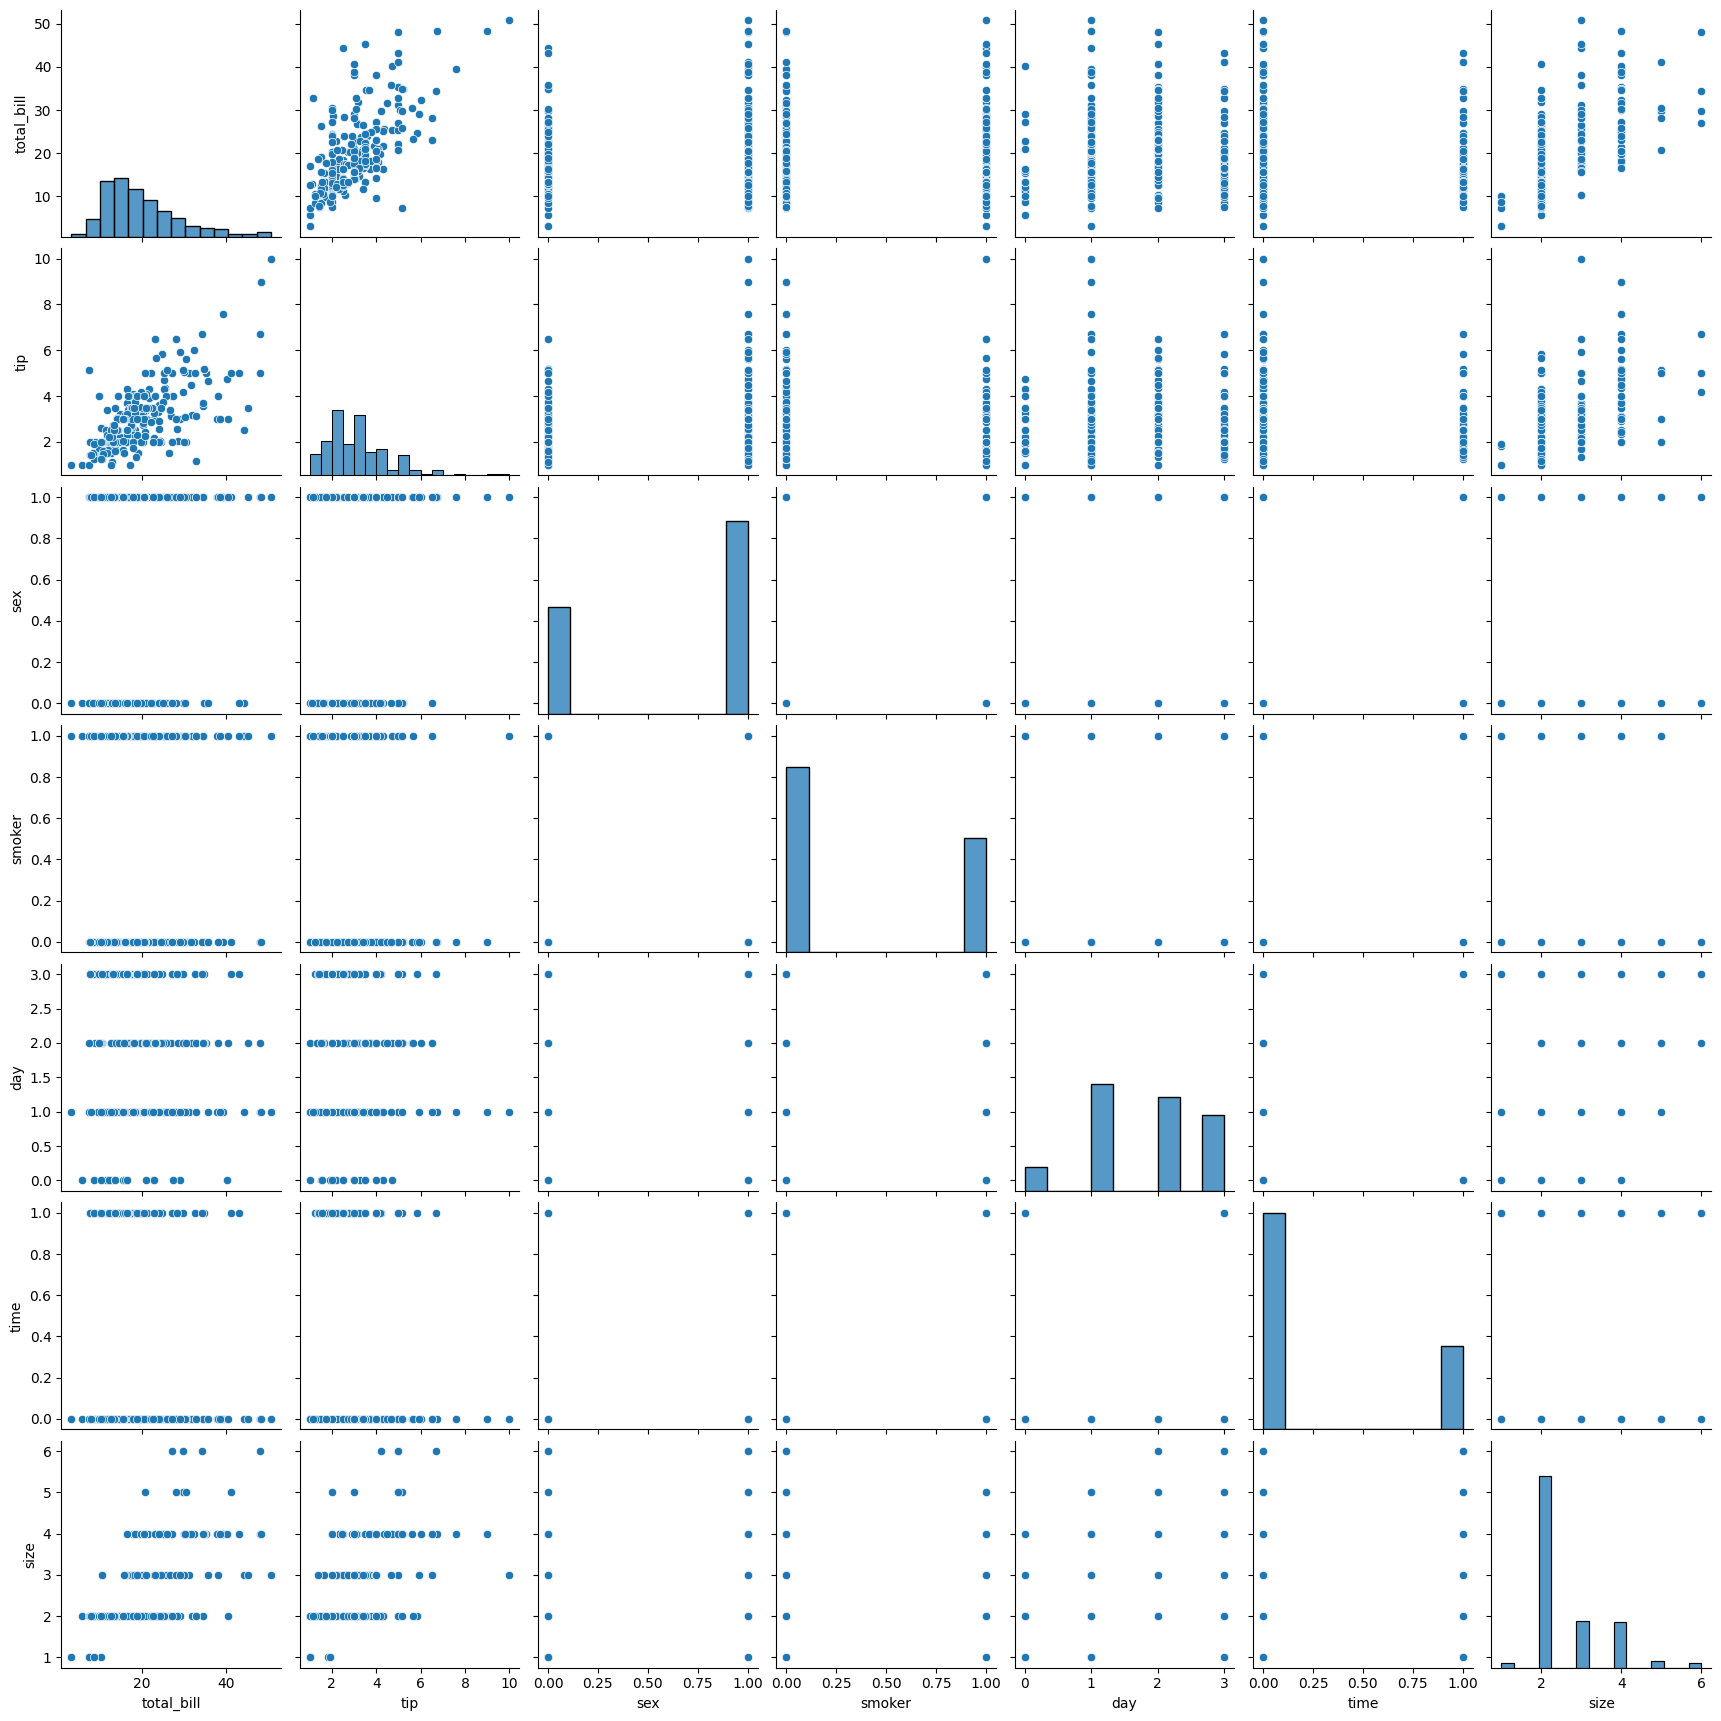

In [2]:
# View basic information about the dataset
# print(data.info())
# print(data.describe())

# Check for missing values
# print(data.isnull().sum())

# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Handle missing values separately for numeric and categorical columns
# Fill numeric columns with the mean value
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# For categorical columns, fill missing values with the mode (most common value)
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Encoding categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store the encoder if needed later

# Visualizing relationships (optional)
sns.pairplot(data)
plt.show()


In [3]:
# Initialize label encoders dictionary to store encoders for each categorical column
label_encoders = {}

# Split data into features and target variable
X = data.drop(columns=['tip'])
y = data['tip']

# Ensure numeric and categorical features are identified correctly
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Convert categorical features to numeric encoding if not done already
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store the encoder for potential inverse transformations if needed

# Scale only the numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train each model and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, predictions),
        'RMSE': np.sqrt(mean_squared_error(y_test, predictions)),
        'R2 Score': r2_score(y_test, predictions)
    }
    print(f'{name} - MAE: {results[name]["MAE"]}, RMSE: {results[name]["RMSE"]}, R2 Score: {results[name]["R2 Score"]}')


Linear Regression - MAE: 0.6703807496461148, RMSE: 0.8335544185167328, R2 Score: 0.44413688261219497
Ridge Regression - MAE: 0.6697162755342894, RMSE: 0.8323411522382481, R2 Score: 0.44575385961500225
Lasso Regression - MAE: 1.047104133961277, RMSE: 1.2036062575607012, R2 Score: -0.15896098636013822
Decision Tree - MAE: 0.9206122448979591, RMSE: 1.1833168533872085, R2 Score: -0.12021670001131546
Random Forest - MAE: 0.7933102040816328, RMSE: 1.0097203122546328, R2 Score: 0.1843532151074373
Support Vector Regression - MAE: 0.6124543684795579, RMSE: 0.78826402213678, R2 Score: 0.5029004697226529
K-Nearest Neighbors - MAE: 0.6964897959183675, RMSE: 0.8703765077862122, R2 Score: 0.39394189461136175


In [5]:
# Cross-validation for each model
cv_results = {}
for name, model in models.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_results[name] = cv_score.mean()
    print(f'{name} - Cross-Validated R2 Score: {cv_results[name]}')


Linear Regression - Cross-Validated R2 Score: 0.3191967183987483
Ridge Regression - Cross-Validated R2 Score: 0.3206520412124833
Lasso Regression - Cross-Validated R2 Score: -0.013383802095549967
Decision Tree - Cross-Validated R2 Score: -0.13907922613384532
Random Forest - Cross-Validated R2 Score: 0.34926213330770556
Support Vector Regression - Cross-Validated R2 Score: 0.3094300249431726
K-Nearest Neighbors - Cross-Validated R2 Score: 0.3105826502821321


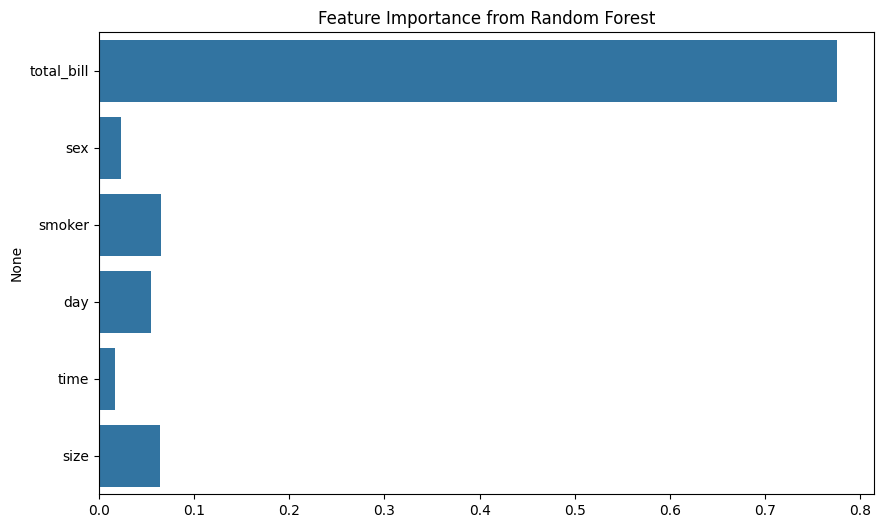

In [6]:
# Extract feature importances from tree-based models (e.g., Random Forest)
feature_importances = models['Random Forest'].feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importance from Random Forest')
plt.show()


Based on the feature importance chart from the Random Forest model, we can provide the following actionable insights to help restaurants improve customer service strategies and revenue management:

1. **Focus on the Total Bill**: Since the total bill is by far the most significant factor impacting tip amounts, restaurant management should consider ways to optimize average spending per customer. Strategies could include:
   - **Upselling and Cross-selling**: Train staff to suggest popular add-ons, appetizers, and beverages that enhance the dining experience and increase the total bill.
   - **Specials and Bundled Offers**: Offer meal bundles or add-on discounts that encourage customers to order more, increasing the bill size.

2. **Consider the Impact of Group Size**: Group size has a notable influence on tip amounts. Larger groups may tip more due to higher bills, so management can:
   - **Tailor Service for Large Groups**: Provide more attentive service, faster table setups, and group-friendly menu options to improve the experience for larger parties.
   - **Implement Automatic Gratuity for Large Parties**: Consider applying a fixed gratuity for groups over a certain size, as it can help ensure fair tips while providing a consistent revenue stream.

3. **Gender and Smoking Preference**: Although these factors have a smaller impact, they still contribute to tipping behavior.
   - **Customer Segmentation**: Analyze gender and smoking preferences further to see if there are patterns in spending or tipping, and tailor services accordingly. For example, if smokers tend to tip more, offering smoking areas or smoke-friendly sections might attract higher-tipping customers.
   - **Personalized Offers**: Provide targeted promotions or service adjustments based on customer demographics if your restaurant has access to such data.

4. **Time of Visit**: The time of day has a minor but notable influence on tipping. 
   - **Adjust Service Strategy by Time**: If tips vary by time (e.g., lunch vs. dinner), adjust staffing and promotions based on expected tip amounts and customer flow. For instance, a more relaxed approach might be suitable for lunch, while dinner may call for a more personalized, attentive service style.
   
5. **Day of the Week**: The day of the week also influences tipping behavior.
   - **Special Offers on Slow Days**: If certain days consistently show lower tipping or spending, run special promotions or loyalty programs to encourage more visits.
   - **Optimize Staffing Levels**: Align staffing levels with expected customer turnout based on the day of the week, ensuring customers get the right service quality without overstaffing.

These insights can help the restaurant management team create a more tailored experience for customers, improving satisfaction, tips, and overall revenue. Let me know if you need more specific recommendations or deeper analysis!

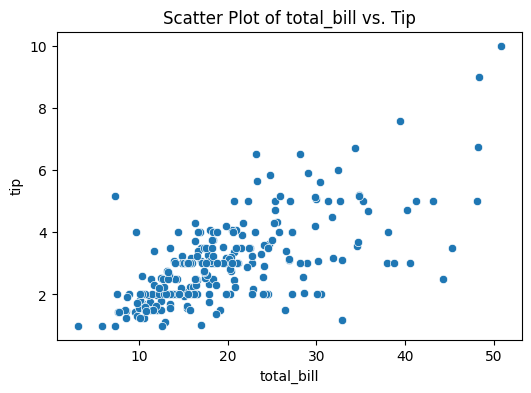

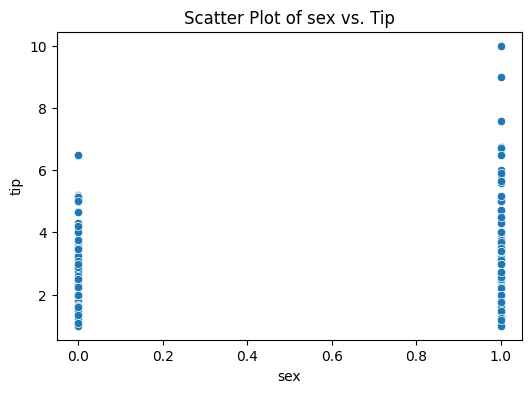

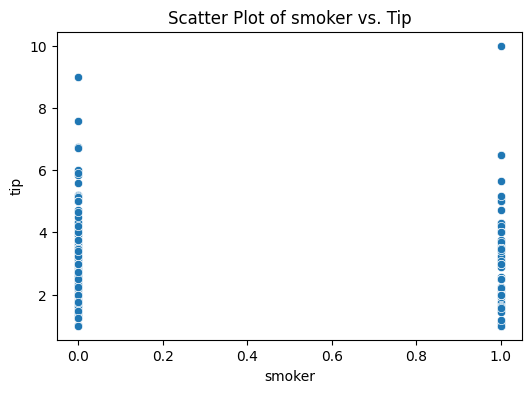

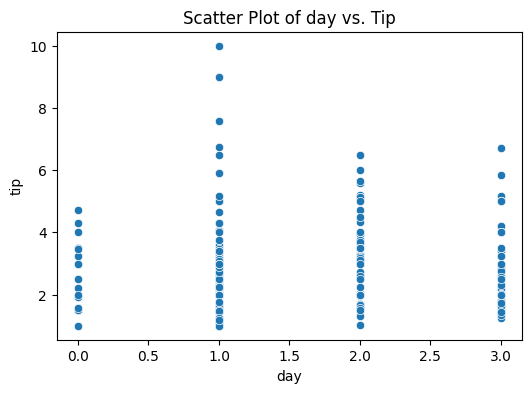

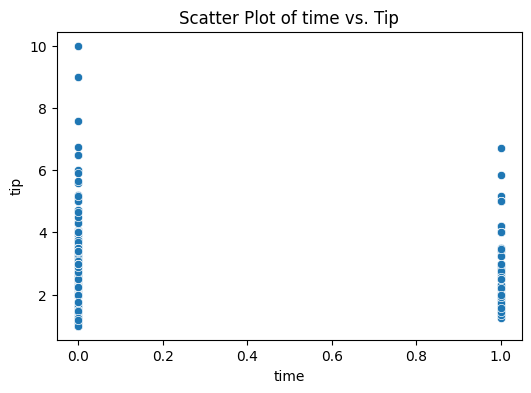

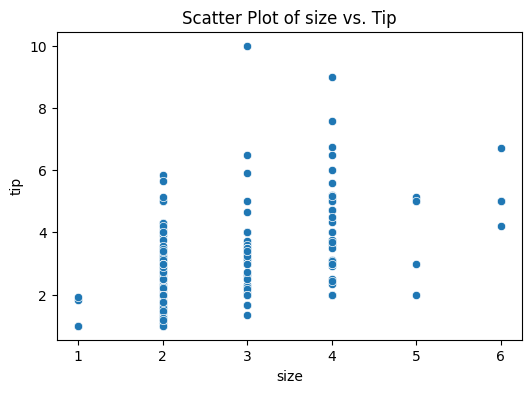

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for each predictor vs. target variable (tip)
for col in data.columns:
    if col != 'tip':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=data, x=col, y='tip')
        plt.title(f'Scatter Plot of {col} vs. Tip')
        plt.show()


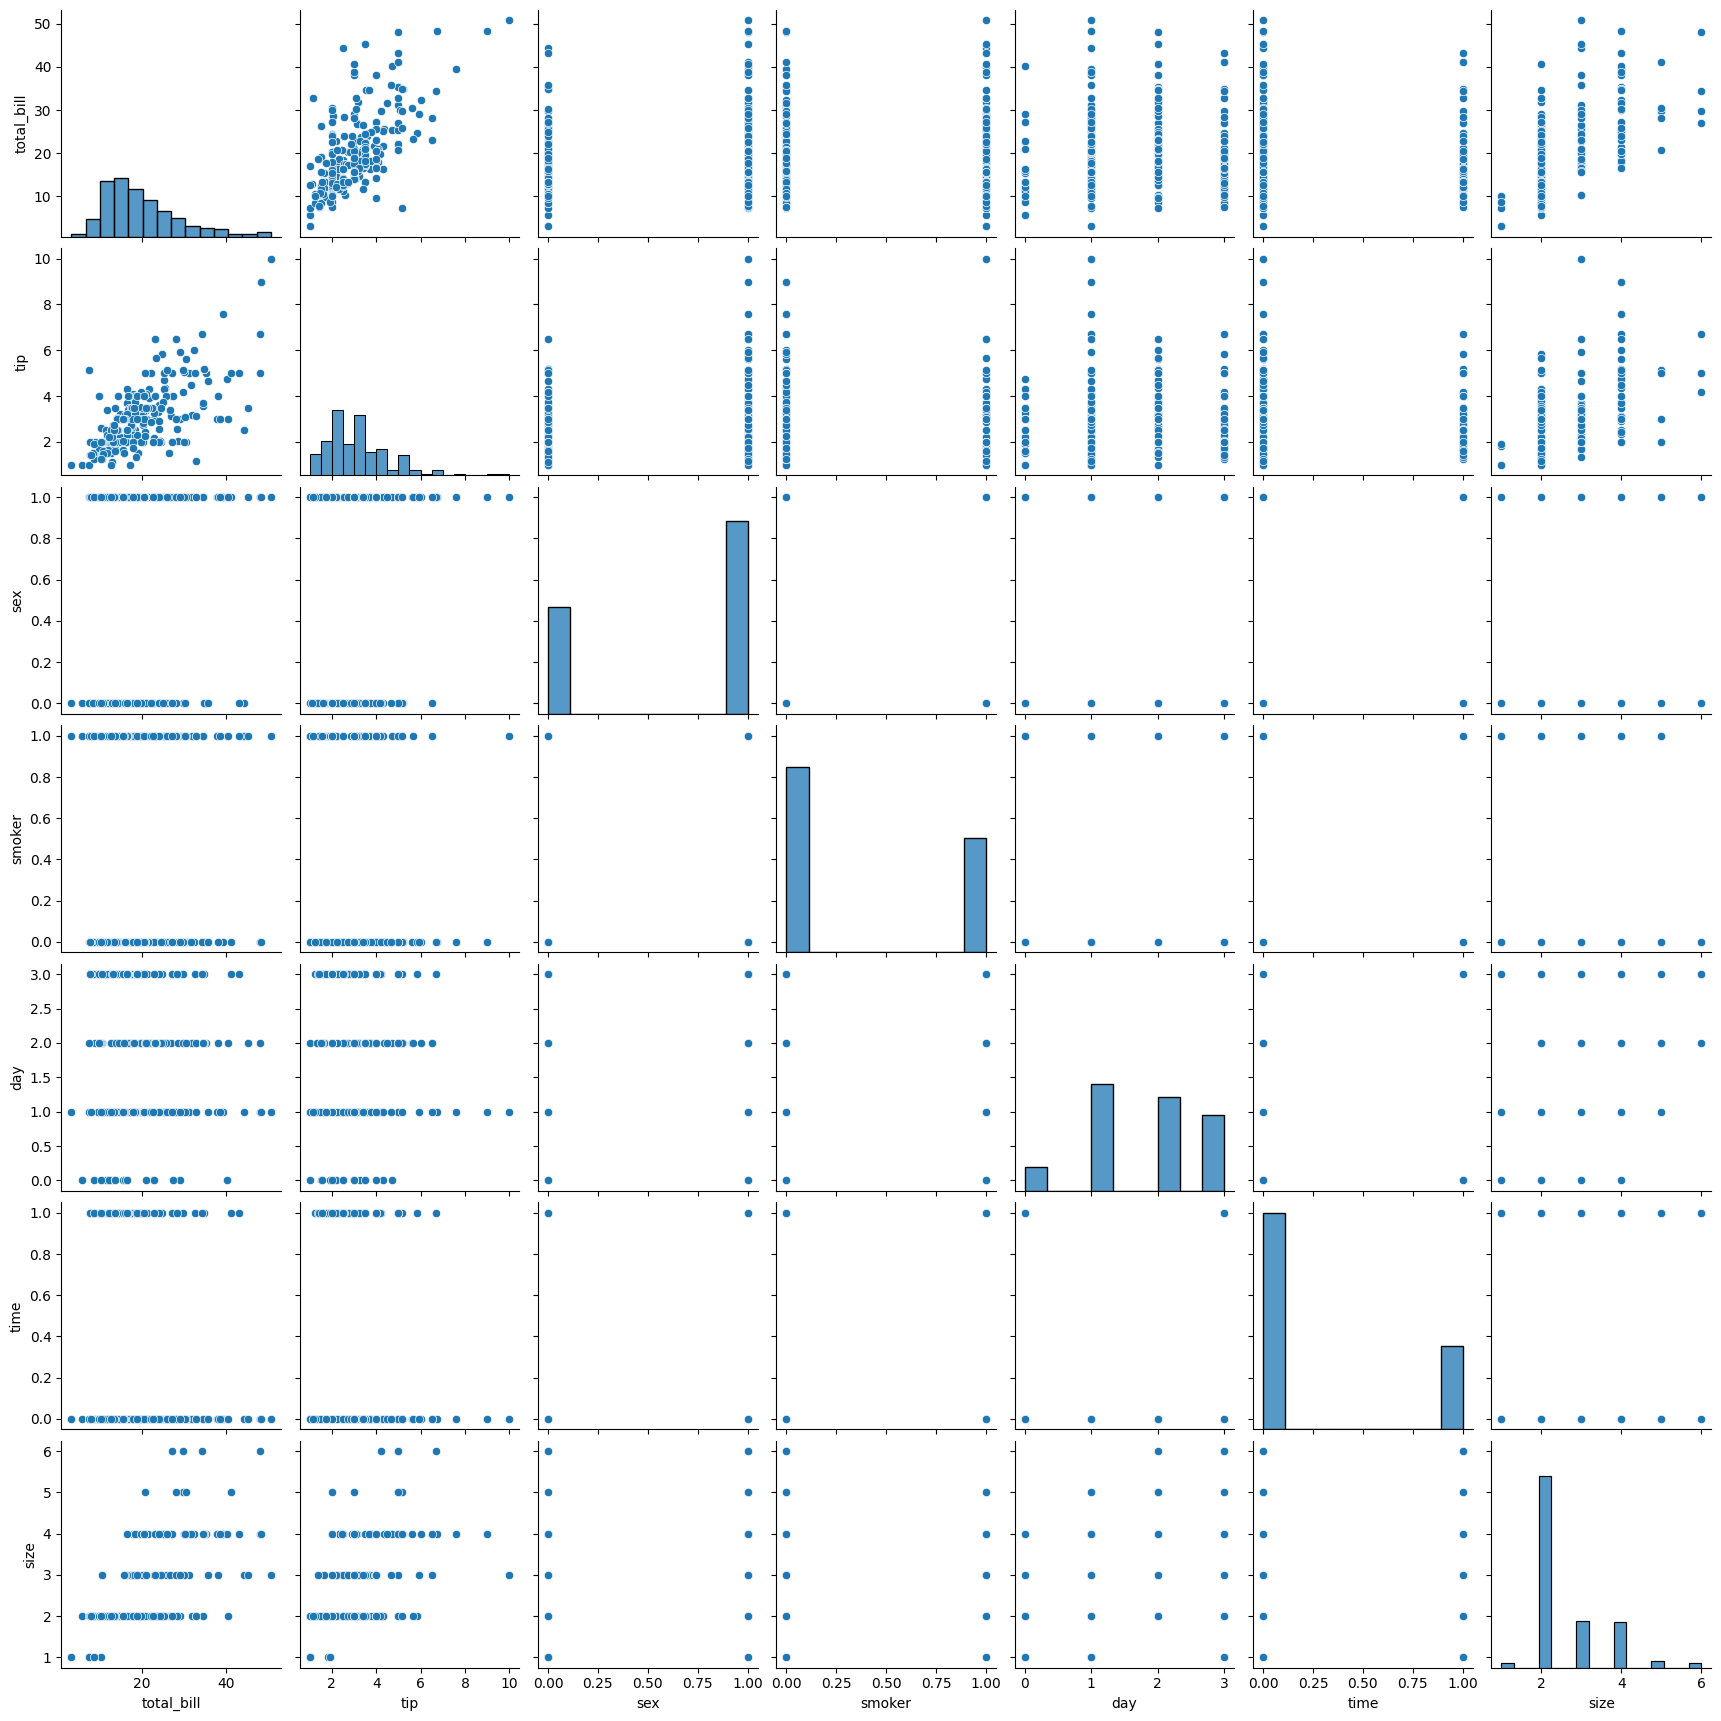

In [8]:
# Pair plot for multiple features
sns.pairplot(data)
plt.show()


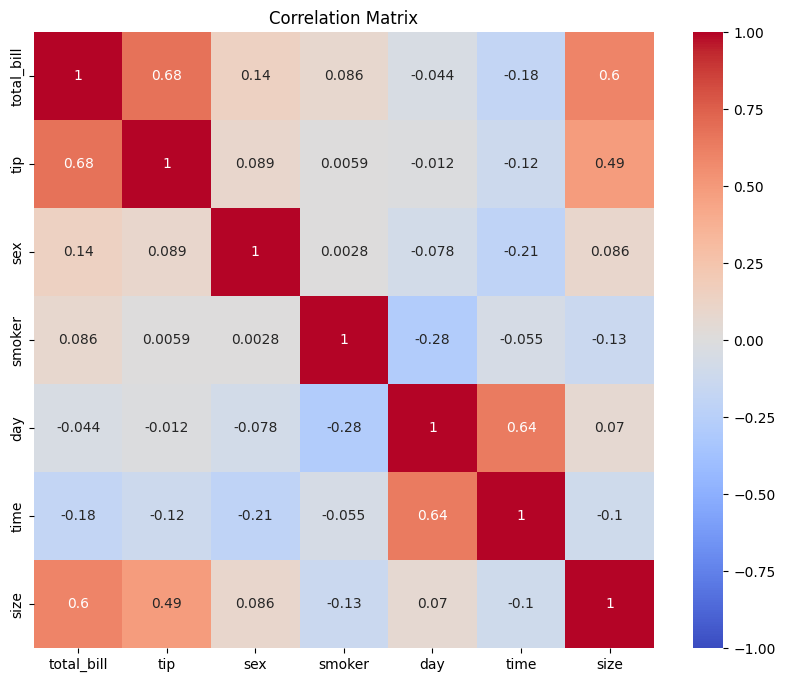

In [9]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [10]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Prepare data for regression (adding a constant for intercept)
X = sm.add_constant(data.drop(columns='tip'))
y = data['tip']

# Fit an OLS model
model = sm.OLS(y, X).fit()

# Perform Rainbow Test for linearity
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print(f'Rainbow Test Statistic: {rainbow_stat}, p-value: {rainbow_p_val}')

# Interpretation
if rainbow_p_val < 0.05:
    print("The data does not follow a linear trend (p < 0.05).")
else:
    print("The data follows a linear trend (p >= 0.05).")


Rainbow Test Statistic: 1.2036274510126599, p-value: 0.15798464222013184
The data follows a linear trend (p >= 0.05).


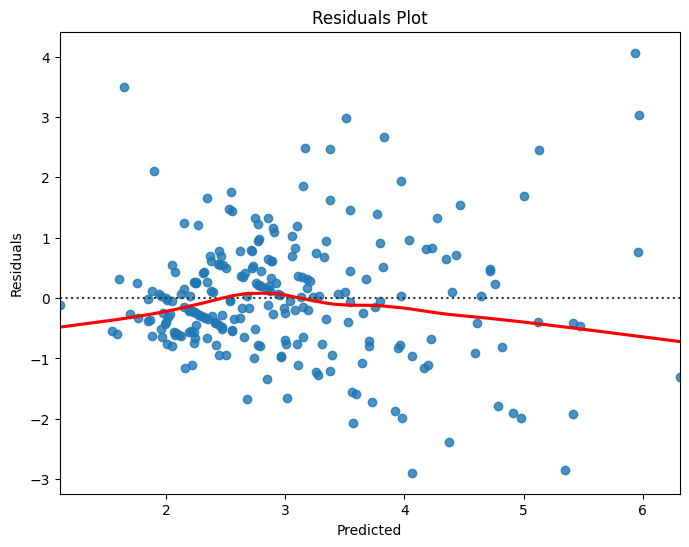

In [11]:
# Plot residuals
predictions = model.predict(X)
residuals = y - predictions

plt.figure(figsize=(8, 6))
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()



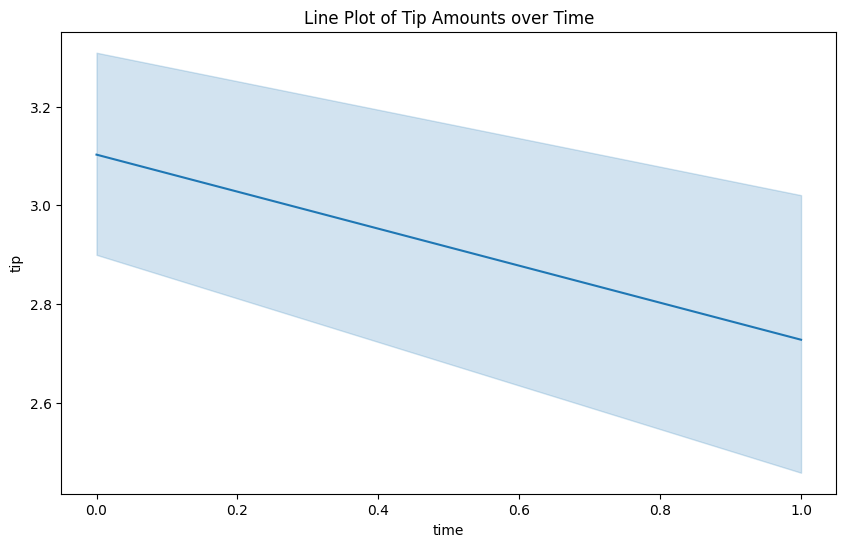

In [12]:
# Line plot (Only applicable if 'time' is a sequential or time-based feature)
if 'time' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='time', y='tip')
    plt.title('Line Plot of Tip Amounts over Time')
    plt.show()


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = data.drop(columns=['tip'])
y = data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose model based on linearity findings
# For example, using Linear Regression here if data is mostly linear
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.6948129686287711
R-squared: 0.4441368826121931


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = data.drop(columns=['tip'])  # Assuming 'tip' is the target variable
y = data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store the models and their performance
model_performance = {}

# Define and train each model, then evaluate its accuracy
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

# Train each model and evaluate performance
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the performance
    model_performance[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")

# Print summary of all model performances
print("\nModel Performance Summary:")
for model_name, performance in model_performance.items():
    print(f"{model_name}: MSE = {performance['MSE']:.2f}, R2 = {performance['R2']:.2f}")


Linear Regression - MSE: 0.69, R2: 0.44
Ridge Regression - MSE: 0.69, R2: 0.45
Lasso Regression - MSE: 0.59, R2: 0.53
Decision Tree - MSE: 0.88, R2: 0.30
Random Forest - MSE: 0.96, R2: 0.23
Support Vector Regression - MSE: 0.54, R2: 0.57
K-Nearest Neighbors - MSE: 0.84, R2: 0.33

Model Performance Summary:
Linear Regression: MSE = 0.69, R2 = 0.44
Ridge Regression: MSE = 0.69, R2 = 0.45
Lasso Regression: MSE = 0.59, R2 = 0.53
Decision Tree: MSE = 0.88, R2 = 0.30
Random Forest: MSE = 0.96, R2 = 0.23
Support Vector Regression: MSE = 0.54, R2 = 0.57
K-Nearest Neighbors: MSE = 0.84, R2 = 0.33
